# Side by side comparison

In [14]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

ncct_dir = "../../data/gravo/NCCT/"
nccts = [f for f in os.listdir(ncct_dir) if f.endswith("nii") and "-" not in f]

[4, 1, 0]


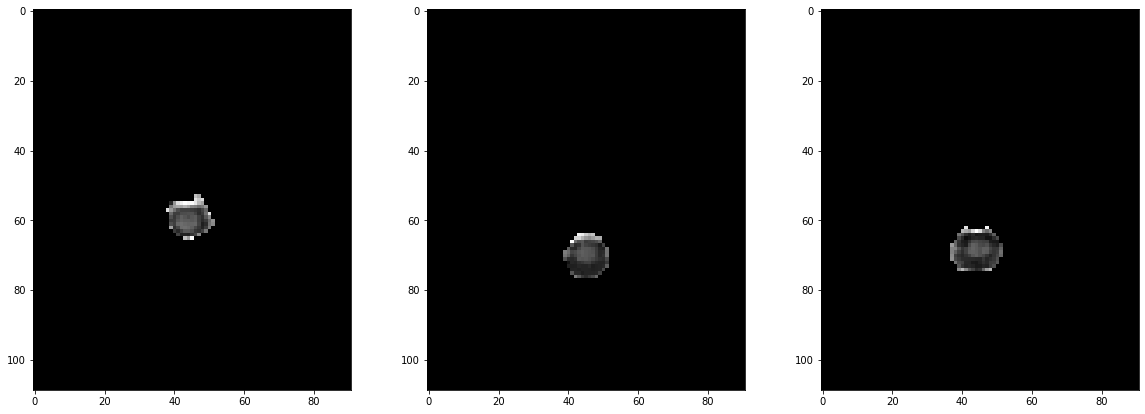


[4, 1, 0]


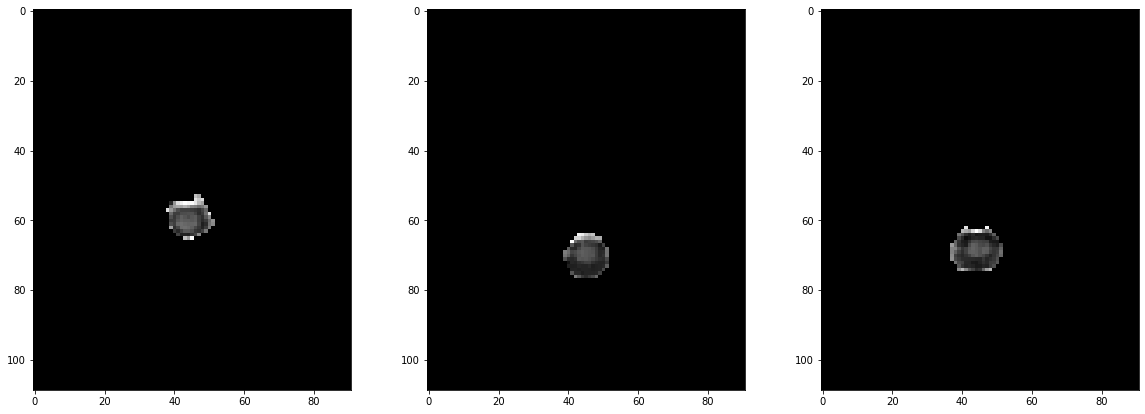

KeyboardInterrupt: Interrupted by user

In [66]:
N = 3
init_pos = [0 for i in range(N)]
np.random.shuffle(nccts)
while True:
    _, axs = plt.subplots(1, N, figsize = (20,7))
    for i in range(N):
        img = nib.load(ncct_dir+nccts[i]).get_fdata()
        if 0 in init_pos:
            while np.count_nonzero(img[:,:,init_pos[i]] > 0) < 100:
                init_pos[i] += 1
        else:
            init_pos[i] += 1
        img = img[:,:,init_pos[i]].T
        img = np.flip(img, 0)
        axs[i].imshow(img, cmap = "gray")
    print(init_pos)
    plt.show()
    input()
    plt.close()